In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install wordcloud-fa


In [ ]:
!pip install tpot
!pip install tpot[tpot-sparse]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=e53b302a3252a71f48e38614ef54ac26480f814bc2dc5471d82d280c003a6a84
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier


In [ ]:
import json
import glob
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection._split import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
data = sqlite3.connect('/content/drive/MyDrive/data/browser (1).db')
query = data.execute("SELECT * From browser")
cols = [column[0] for column in query.description]
results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
results = results.iloc[:-2,:]
# results.to_excel('/content/drive/MyDrive/data/linkdin.xlsx')

In [ ]:
results.head()

,id,name,bio,university,grade,job,about,experience,education,skills,...,comment2,comment3,comment4,comment5,reaction1,reaction2,reaction3,reaction4,reaction5,link
0,1,saba nassiri pour,Research assist at university of Tehran|M.Sc. ...,tehran,Materials Engineering,student,I am a researcher in the field of Tissue Engin...,Masters Student,"university of tehran , imam khomein internatio...","tissue engineer , researcher",...,I am delighted to inform you that my second pa...,Excited to share that I have started a new res...,I’m happy to share that I’m starting a new pos...,It was a pleasure to learn Python as my first ...,How cells in your body move:\r\n\r\nCells can ...,#Bone_tissue_engineering\n\nIn bone tissue eng...,Truly honored to receive the Connors BWH-MGB C...,I’m happy to share that I’ve obtained a new ce...,Excited to share my IELTS score ( 7 ). Hard wo...,https://www.linkedin.com/in/saba-nassiripour/
1,2,Zahra Lalegani,University of Tehran,University of Tehran,None,student,None,None,University of Tehran,None,...,None,None,None,None,📣 Nano Letters publication alert! Using the DE...,I am thrilled to have been elected to the Amer...,UncorrelaTEd FET Open Project and coordinating...,"April 20, 2023 marks an important milestone in...",In situ transmission electron microscopy inves...,https://www.linkedin.com/in/zahra-lalegani-085...
2,3,Zahra Behrooznia,Research and development specialist at توسعه گ...,University of Tehran,"Bachelor's degree, Metallurgical Engineering\r\n",student,None,Research and development specialist,University of Tehran,None,...,I am honored to express that my first research...,I’m happy to share that I’m starting a new pos...,"Today, I have officially started my #PhD journ...",None,I'm glad to announce that I successfully defen...,It is with great pleasure that I hereby declar...,Appreciation ceremony for the active members o...,Hi everyone - I am looking for a new role and ...,I would like to share our last paper on the el...,https://www.linkedin.com/in/zahra-behrooznia-6...
3,4,Abolfazl Anvari,3d-bioprinting R&D at OmidAfarinan. Nano educa...,University of Tehran,Ph.D. Student in Computer Science,نشریه فراسوی مواد,None,"\r\nManaging Editor , Educational NanoTechnolo...","\r\nUniversity of Tehran\r\nBachelor's degree,...",None,...,"In a normal country, you will be happy with yo...",This Chapter is over. Thanks to everyone who h...,I am delighted to announce that our review art...,Here is the result of my #IELTS exam. As a per...,New Paper: Fabrication and optimization of AA5...,Advanced Functional Ceramics\r\nYonsei Univers...,I am delighted to announce that I was given an...,نظر دوستان چیست که ویدیوهایی راجع به موضوعات م...,"In a normal country, you will be happy with yo...",https://www.linkedin.com/in/abolfazl-anvari
4,5,seyed saeed mohaghegh,Student of Electrical Engineering at Shiraz Un...,Shiraz University,Electrical Engineering,Student,None,None,Shiraz University,"Python (Programming Language) , \r\nDeep Learn...",...,.,.,None,None,We have built a #non_contact #liquid_level #co...,Not a fan of posting everything actually. But ...,I am thrilled to announce that my friend Erfan...,We all create - or recreate - our realities. W...,GeoMars is a technological platform consisting...,https://www.linkedin.com/in/seyed-saeed-mohagh...


In [ ]:
len(results)

899

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/data/فایل اکسل نهایی 2.xlsx')
df.head()

,createdDate,university,کد دانشگاه,grade,job,experience,کد تجربه کاری,Unnamed: 7,Unnamed: 8,typeMarried,scoreN,scoreE,scoreO,scoreA,scoreC,سن,جنسیت,تحصیلات,نوع استخدام
0,2022-12-12 11:21:38,پیام نور,3,تجربی,کارگر,مرغداری,1,NaN,NaN,متاهل,47.0,26.0,21.0,35.0,31.0,کمتر از 20 سال,مذکر,دیپلم,پاره وقت
1,2022-10-24 09:47:24,تهران,1,مدیریت بازرگانی,دانشجو,۲سال,2,NaN,NaN,مجرد,21.0,36.0,42.0,37.0,33.0,· 20-24 سال,مونث,فوق دیپلم,قراردادی
2,2022-10-13 10:23:07,تهران,1,مهندسی مواد/شناسایی و انتخاب مواد,دانشجو,۱ سال,1,NaN,NaN,مجرد,0.0,0.0,0.0,0.0,0.0,· 24-28 سال,مذکر,کارشناسی,پیمانی
3,2022-09-25 08:22:01,دانشگاه تهران,1,مهندسی متالورژی,پستداک,5 سال,3,NaN,NaN,مجرد,11.0,28.0,17.0,30.0,34.0,· 28-32 سال,مذکر,کارشناسی ارشد,قراردادی
4,2022-07-26 16:39:23,تهران,1,مواد و متالورژی,R&D,تحقیق و توسعه,3,NaN,NaN,مجرد,33.0,27.0,27.0,30.0,35.0,· 32-36 سال,مذکر,دکتری,پیمانی


In [ ]:
df = df.iloc[0:899]
df

,createdDate,university,کد دانشگاه,grade,job,experience,کد تجربه کاری,Unnamed: 7,Unnamed: 8,typeMarried,scoreN,scoreE,scoreO,scoreA,scoreC,سن,جنسیت,تحصیلات,نوع استخدام
0,2022-12-12 11:21:38,پیام نور,3,تجربی,کارگر,مرغداری,1,NaN,NaN,متاهل,47.0,26.0,21.0,35.0,31.0,کمتر از 20 سال,مذکر,دیپلم,پاره وقت
1,2022-10-24 09:47:24,تهران,1,مدیریت بازرگانی,دانشجو,۲سال,2,NaN,NaN,مجرد,21.0,36.0,42.0,37.0,33.0,· 20-24 سال,مونث,فوق دیپلم,قراردادی
2,2022-10-13 10:23:07,تهران,1,مهندسی مواد/شناسایی و انتخاب مواد,دانشجو,۱ سال,1,NaN,NaN,مجرد,0.0,0.0,0.0,0.0,0.0,· 24-28 سال,مذکر,کارشناسی,پیمانی
3,2022-09-25 08:22:01,دانشگاه تهران,1,مهندسی متالورژی,پستداک,5 سال,3,NaN,NaN,مجرد,11.0,28.0,17.0,30.0,34.0,· 28-32 سال,مذکر,کارشناسی ارشد,قراردادی
4,2022-07-26 16:39:23,تهران,1,مواد و متالورژی,R&D,تحقیق و توسعه,3,NaN,NaN,مجرد,33.0,27.0,27.0,30.0,35.0,· 32-36 سال,مذکر,دکتری,پیمانی
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2022-07-01 01:26:01,دانشگاه تهران,1,کارشناسی عمران,دانشجو,تدریس ریاضی و مشاوره کنکور,3,NaN,NaN,مجرد,16.0,33.0,23.0,35.0,27.0,· 28-32 سال,مونث,کارشناسی,رسمی
895,2022-06-30 19:29:37,دانشگاه تهران,1,فلسفه,معلم,8 سال سابقه تدریس,3,NaN,NaN,مجرد,17.0,33.0,21.0,31.0,35.0,· بیشتر از 36 سال,مذکر,کارشناسی ارشد,رسمی
896,2022-06-30 18:13:20,تهران,1,حقوق,آزاد,..,2,NaN,NaN,متاهل,17.0,36.0,38.0,30.0,41.0,· 28-32 سال,مونث,دکتری,قراردادی
897,2022-06-30 17:08:49,تهران,1,عمران/مهندسی و مدیریت ساخت,دانشجو,خدمات نقشه‌برداری فراساحلی,3,NaN,NaN,مجرد,22.0,32.0,30.0,33.0,36.0,· 32-36 سال,مذکر,دکتری,پیمانی


In [ ]:
df.drop(['createdDate'],axis = 1,inplace  = True)
df.head()

,university,کد دانشگاه,grade,job,experience,کد تجربه کاری,Unnamed: 7,Unnamed: 8,typeMarried,scoreN,scoreE,scoreO,scoreA,scoreC,سن,جنسیت,تحصیلات,نوع استخدام
0,پیام نور,3,تجربی,کارگر,مرغداری,1,NaN,NaN,متاهل,47.0,26.0,21.0,35.0,31.0,کمتر از 20 سال,مذکر,دیپلم,پاره وقت
1,تهران,1,مدیریت بازرگانی,دانشجو,۲سال,2,NaN,NaN,مجرد,21.0,36.0,42.0,37.0,33.0,· 20-24 سال,مونث,فوق دیپلم,قراردادی
2,تهران,1,مهندسی مواد/شناسایی و انتخاب مواد,دانشجو,۱ سال,1,NaN,NaN,مجرد,0.0,0.0,0.0,0.0,0.0,· 24-28 سال,مذکر,کارشناسی,پیمانی
3,دانشگاه تهران,1,مهندسی متالورژی,پستداک,5 سال,3,NaN,NaN,مجرد,11.0,28.0,17.0,30.0,34.0,· 28-32 سال,مذکر,کارشناسی ارشد,قراردادی
4,تهران,1,مواد و متالورژی,R&D,تحقیق و توسعه,3,NaN,NaN,مجرد,33.0,27.0,27.0,30.0,35.0,· 32-36 سال,مذکر,دکتری,پیمانی


In [ ]:
results['Lable'] = df['scoreN']
results

,id,name,bio,university,grade,job,about,experience,education,skills,...,Languages,Licenses_certifications,like_post_1,like_post_2,like_post_3,like_post_4,like_post_5,link,text,Lable
0,1,saba nassiri pour,Research assist at university of Tehran|M.Sc. ...,tehran,Materials Engineering,student,I am a researcher in the field of Tissue Engin...,Masters Student,"university of tehran , imam khomein internatio...","tissue engineer , researcher",...,"english , persian","\r\nCell Culture Technique,","44 , Sónia O. Pereira , Maria Ioannou , Karina...","57 , Siavash Iravani , Mohammad Javad Mirghafo...","37143 , Deepthisri K R , Muskan SN , SUBHAM SA...","157 , Sara Rashighi , Mobina B. , mahdi nabidu...",,https://www.linkedin.com/in/saba-nassiripour/,It is with great pleasure that I hereby declar...,47.0
1,2,Zahra Lalegani,University of Tehran,University of Tehran,,student,,,University of Tehran,,...,,,,,,,,https://www.linkedin.com/in/zahra-lalegani-085...,من که همخوانی محتوای عکس با متن منتشر شده در م...,21.0
2,3,Zahra Behrooznia,Research and development specialist at توسعه گ...,University of Tehran,"Bachelor's degree, Metallurgical Engineering\r\n",student,,Research and development specialist,University of Tehran,,...,,,,,,,,https://www.linkedin.com/in/zahra-behrooznia-6...,Finally!!!\r\nI'm so excited to share my IELTS...,0.0
3,4,Abolfazl Anvari,3d-bioprinting R&D at OmidAfarinan. Nano educa...,University of Tehran,Ph.D. Student in Computer Science,نشریه فراسوی مواد,,"\r\nManaging Editor , Educational NanoTechnolo...","\r\nUniversity of Tehran\r\nBachelor's degree,...",,...,,,"9 , Amin Azad , Amin Maghsoudi ,Amir hossein A...","13 , Mohammad Kord , Kamyar Kafi , Zohreh Mous...","66 , Mohammad Javad Mirghafouri , Bahar Khanda...","16 , Mohammad Kord , Mohammadreza Pazira , Par...","4 , Arash Imami Khiyavi , lJavad Charkhchian ,...",https://www.linkedin.com/in/abolfazl-anvari,New Paper: Fabrication and optimization of AA5...,11.0
4,5,seyed saeed mohaghegh,Student of Electrical Engineering at Shiraz Un...,Shiraz University,Electrical Engineering,Student,,,Shiraz University,"Python (Programming Language) , \r\nDeep Learn...",...,,,,,,,,https://www.linkedin.com/in/seyed-saeed-mohagh...,...We have built a #non_contact #liquid_level ...,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,895,Matin Hamidi,"MS.c Student in Industrial Engineering, Financ...",K. N. Toosi University of Technology,"MEng, Logistics and Supply Chain Management",,"In addition, I worked at Tyndall National Inst...",Embedded Software Engineer,Iran University of Science and Technology,English,...,,,,,,,,https://www.linkedin.com/in/matin-hamidi-49847...,ما منتظر یک همکار تازه هستیم که درک محصولی و ف...,16.0
895,896,Sadroddin Arbabi,Senior Consultant at ILIA Corporation,,Mechanical Engineering,,,Research Assistant,K. N. Toosi University of Technology\r\n,Research,...,,,,,,,,https://www.linkedin.com/in/sadroddin-arbabi-3...,『グローブ型コントローラーと遠隔操作ロボットハンドの統合』\r\nhttps://lnkd....,17.0
896,897,Farbod Asareh,Student at K. N. Toosi University of Technology,Kharazmi University,"Industrial Engineering,",,"Currently, I am working on a project called To...",Electronic Engineer,Sharif University of Technology,,...,\r\nEnglish\r\n\r\nPersian,,,,,,,https://www.linkedin.com/in/farbod-asareh-861a...,مرحله نهایی #گیمین هم جمعه، در بازار چارسو تهر...,17.0
897,898,Mahdi Saeidpanah\r\n,Student at Department of Industrial Engineerin...,Khatam University,Industrial Engineering,,,,Sharif University of Technology,Microsoft Office,...,,,"2 , \r\nSina Shirazifard\r\nMohammad Eshrati\r\n",,,,,https://www.linkedin.com/in/mahdi-saeidpanah-5...,"This Sunday, January 8 marks three years since...",22.0


In [ ]:
results.loc[(results['Lable'] >= 0) & (results['Lable'] < 18), 'Lable'] = 1
results.loc[(results['Lable'] >= 18) & (results['Lable'] < 30), 'Lable'] = 2
results.loc[(results['Lable'] >= 30) , 'Lable'] = 3
results

,id,name,bio,university,grade,job,about,experience,education,skills,...,comment3,comment4,comment5,reaction1,reaction2,reaction3,reaction4,reaction5,link,Lable
0,1,saba nassiri pour,Research assist at university of Tehran|M.Sc. ...,tehran,Materials Engineering,student,I am a researcher in the field of Tissue Engin...,Masters Student,"university of tehran , imam khomein internatio...","tissue engineer , researcher",...,Excited to share that I have started a new res...,I’m happy to share that I’m starting a new pos...,It was a pleasure to learn Python as my first ...,How cells in your body move:\r\n\r\nCells can ...,#Bone_tissue_engineering\n\nIn bone tissue eng...,Truly honored to receive the Connors BWH-MGB C...,I’m happy to share that I’ve obtained a new ce...,Excited to share my IELTS score ( 7 ). Hard wo...,https://www.linkedin.com/in/saba-nassiripour/,3.0
1,2,Zahra Lalegani,University of Tehran,University of Tehran,None,student,None,None,University of Tehran,None,...,None,None,None,📣 Nano Letters publication alert! Using the DE...,I am thrilled to have been elected to the Amer...,UncorrelaTEd FET Open Project and coordinating...,"April 20, 2023 marks an important milestone in...",In situ transmission electron microscopy inves...,https://www.linkedin.com/in/zahra-lalegani-085...,2.0
2,3,Zahra Behrooznia,Research and development specialist at توسعه گ...,University of Tehran,"Bachelor's degree, Metallurgical Engineering\r\n",student,None,Research and development specialist,University of Tehran,None,...,I’m happy to share that I’m starting a new pos...,"Today, I have officially started my #PhD journ...",None,I'm glad to announce that I successfully defen...,It is with great pleasure that I hereby declar...,Appreciation ceremony for the active members o...,Hi everyone - I am looking for a new role and ...,I would like to share our last paper on the el...,https://www.linkedin.com/in/zahra-behrooznia-6...,1.0
3,4,Abolfazl Anvari,3d-bioprinting R&D at OmidAfarinan. Nano educa...,University of Tehran,Ph.D. Student in Computer Science,نشریه فراسوی مواد,None,"\r\nManaging Editor , Educational NanoTechnolo...","\r\nUniversity of Tehran\r\nBachelor's degree,...",None,...,This Chapter is over. Thanks to everyone who h...,I am delighted to announce that our review art...,Here is the result of my #IELTS exam. As a per...,New Paper: Fabrication and optimization of AA5...,Advanced Functional Ceramics\r\nYonsei Univers...,I am delighted to announce that I was given an...,نظر دوستان چیست که ویدیوهایی راجع به موضوعات م...,"In a normal country, you will be happy with yo...",https://www.linkedin.com/in/abolfazl-anvari,1.0
4,5,seyed saeed mohaghegh,Student of Electrical Engineering at Shiraz Un...,Shiraz University,Electrical Engineering,Student,None,None,Shiraz University,"Python (Programming Language) , \r\nDeep Learn...",...,.,None,None,We have built a #non_contact #liquid_level #co...,Not a fan of posting everything actually. But ...,I am thrilled to announce that my friend Erfan...,We all create - or recreate - our realities. W...,GeoMars is a technological platform consisting...,https://www.linkedin.com/in/seyed-saeed-mohagh...,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,895,Matin Hamidi,"MS.c Student in Industrial Engineering, Financ...",K. N. Toosi University of Technology,"MEng, Logistics and Supply Chain Management",None,"In addition, I worked at Tyndall National Inst...",Embedded Software Engineer,Iran University of Science and Technology,English,...,None,None,None,ما منتظر یک همکار تازه هستیم که درک محصولی و ف...,We are Hiring!\r\n🔹️Technical Support\r\n\r\ni...,سلام دوستان\n\nما به دنبال یک هم تیمی هستیم که...,What were leaders reading during the second qu...,In the last decade we’ve seen around 400 launc...,https://www.linkedin.com/in/matin-hamidi-49847...,1.0
895,896,Sadroddin Arbabi,Senior Consultant at ILIA Corporation,None,Mechanical Engineering,None,None,Research Assistant,K. 

<Axes: >

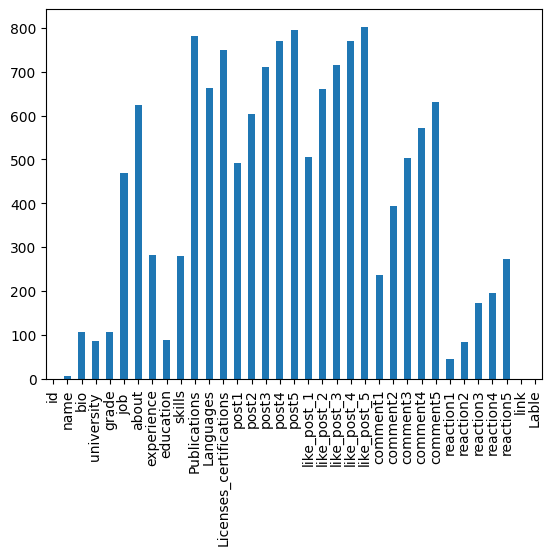

In [ ]:
results.isna().sum().plot(kind='bar')

<Axes: >

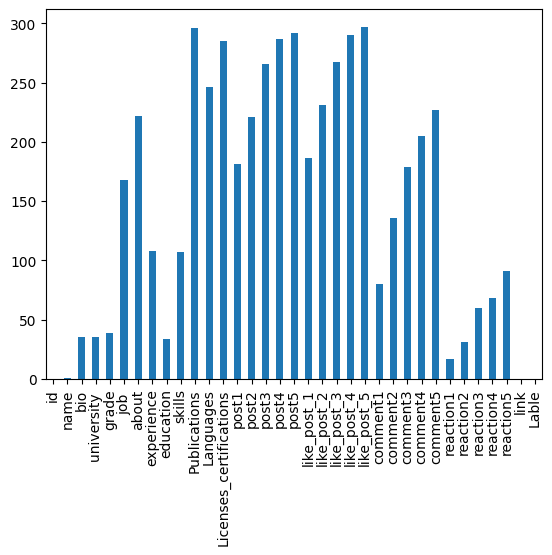

In [ ]:
df1 = results[results['Lable']==1]
df1.isna().sum().plot(kind='bar')

<Axes: >

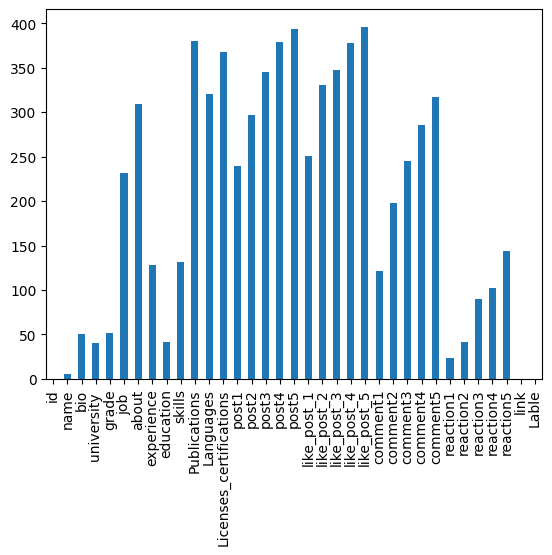

In [ ]:
df1 = results[results['Lable']==2]
df1.isna().sum().plot(kind='bar')

<Axes: >

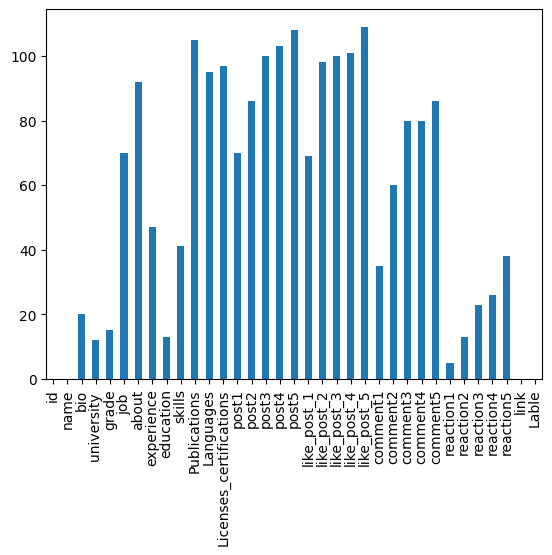

In [ ]:
df1 = results[results['Lable']==3]
df1.isna().sum().plot(kind='bar')

In [ ]:
results.replace(np.nan,'',inplace=True)

results['text'] = (results["comment1"].astype(str) + results["comment2"].astype(str) +results["comment3"].astype(str) +results["comment4"].astype(str) +
                   results["comment5"].astype(str) + results["reaction1"].astype(str) + results["reaction2"].astype(str) + results["reaction3"].astype(str) +
                   results["reaction4"].astype(str) + results["reaction5"].astype(str) + results["reaction1"].astype(str) +
                   results["post1"].astype(str) + results["post2"].astype(str) +results["post3"].astype(str) +results["post4"].astype(str) +
                   results["post5"].astype(str) )
results


,id,name,bio,university,grade,job,about,experience,education,skills,...,comment3,comment4,comment5,reaction1,reaction2,reaction3,reaction4,reaction5,link,text
0,1,saba nassiri pour,Research assist at university of Tehran|M.Sc. ...,tehran,Materials Engineering,student,I am a researcher in the field of Tissue Engin...,Masters Student,"university of tehran , imam khomein internatio...","tissue engineer , researcher",...,Excited to share that I have started a new res...,I’m happy to share that I’m starting a new pos...,It was a pleasure to learn Python as my first ...,How cells in your body move:\r\n\r\nCells can ...,#Bone_tissue_engineering\n\nIn bone tissue eng...,Truly honored to receive the Connors BWH-MGB C...,I’m happy to share that I’ve obtained a new ce...,Excited to share my IELTS score ( 7 ). Hard wo...,https://www.linkedin.com/in/saba-nassiripour/,It is with great pleasure that I hereby declar...
1,2,Zahra Lalegani,University of Tehran,University of Tehran,,student,,,University of Tehran,,...,,,,📣 Nano Letters publication alert! Using the DE...,I am thrilled to have been elected to the Amer...,UncorrelaTEd FET Open Project and coordinating...,"April 20, 2023 marks an important milestone in...",In situ transmission electron microscopy inves...,https://www.linkedin.com/in/zahra-lalegani-085...,من که همخوانی محتوای عکس با متن منتشر شده در م...
2,3,Zahra Behrooznia,Research and development specialist at توسعه گ...,University of Tehran,"Bachelor's degree, Metallurgical Engineering\r\n",student,,Research and development specialist,University of Tehran,,...,I’m happy to share that I’m starting a new pos...,"Today, I have officially started my #PhD journ...",,I'm glad to announce that I successfully defen...,It is with great pleasure that I hereby declar...,Appreciation ceremony for the active members o...,Hi everyone - I am looking for a new role and ...,I would like to share our last paper on the el...,https://www.linkedin.com/in/zahra-behrooznia-6...,Finally!!!\r\nI'm so excited to share my IELTS...
3,4,Abolfazl Anvari,3d-bioprinting R&D at OmidAfarinan. Nano educa...,University of Tehran,Ph.D. Student in Computer Science,نشریه فراسوی مواد,,"\r\nManaging Editor , Educational NanoTechnolo...","\r\nUniversity of Tehran\r\nBachelor's degree,...",,...,This Chapter is over. Thanks to everyone who h...,I am delighted to announce that our review art...,Here is the result of my #IELTS exam. As a per...,New Paper: Fabrication and optimization of AA5...,Advanced Functional Ceramics\r\nYonsei Univers...,I am delighted to announce that I was given an...,نظر دوستان چیست که ویدیوهایی راجع به موضوعات م...,"In a normal country, you will be happy with yo...",https://www.linkedin.com/in/abolfazl-anvari,New Paper: Fabrication and optimization of AA5...
4,5,seyed saeed mohaghegh,Student of Electrical Engineering at Shiraz Un...,Shiraz University,Electrical Engineering,Student,,,Shiraz University,"Python (Programming Language) , \r\nDeep Learn...",...,.,,,We have built a #non_contact #liquid_level #co...,Not a fan of posting everything actually. But ...,I am thrilled to announce that my friend Erfan...,We all create - or recreate - our realities. W...,GeoMars is a technological platform consisting...,https://www.linkedin.com/in/seyed-saeed-mohagh...,...We have built a #non_contact #liquid_level ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,895,Matin Hamidi,"MS.c Student in Industrial Engineering, Financ...",K. N. Toosi University of Technology,"MEng, Logistics and Supply Chain Management",,"In addition, I worked at Tyndall National Inst...",Embedded Software Engineer,Iran University of Science and Technology,English,...,,,,ما منتظر یک همکار تازه هستیم که درک محصولی و ف...,We are Hiring!\r\n🔹️Technical Support\r\n\r\ni...,سلام دوستان\n\nما به دنبال یک هم تیمی هستیم که...,What were leaders reading during the second qu...,In the last decade we’ve seen around 400 launc...,https://www.linkedin.com/in/

# Classificaion

## scoreN
## preprocessing


In [ ]:
data = results['text']
comment_words = ''
comment_words += " ".join(data)+" "
words = set(nltk.corpus.words.words())
" ".join(w for w in nltk.wordpunct_tokenize(comment_words) \
         if w.lower() in words or not w.isalpha())


'It is with great pleasure that I hereby declare the successful defense of my Master of Science thesis " The study of construction of an initial edge dislocation in aluminum by Molecular Dynamics simulation and its by analytical , Transmission Electron Microscopy and " in Science and Engineering . The journey leading up to this moment been one of immense personal and intellectual growth , marked by a series of that have tested my mettle and expanded my . I am deeply grateful for the unwavering support and guidance provided by my Prof . and . , , and throughout this arduous process . Armed with the knowledge and acquired during my graduate , I look forward to myself to future with vigor and purpose . If you are interested in Molecular Dynamics simulation of and High Resolution of dislocation , you can leave your in the section or send me a message . # # # # : comment = 🌺 I am delighted to inform you that my second paper , which is an extract from my project , been in the Advanced Engine

In [ ]:
lemmatized_texts = comment_words

In [ ]:
comment_words = ''
comment_words += " ".join(lemmatized_texts)+" "

In [ ]:
words = set(nltk.corpus.words.words())

sent = " ".join(w for w in nltk.wordpunct_tokenize(comment_words) if w.lower() in words or not w.isalpha())

type(sent)

str

In [ ]:
results.drop(['comment1','comment2','comment3','comment4','comment5',
              'post1','post2','post3','post4','post5',
              'reaction1','reaction2','reaction3','reaction4','reaction5'],axis = 1,inplace=True)
results.head()

,id,name,bio,university,grade,job,about,experience,education,skills,Publications,Languages,Licenses_certifications,like_post_1,like_post_2,like_post_3,like_post_4,like_post_5,link,text
0,1,saba nassiri pour,Research assist at university of Tehran|M.Sc. ...,tehran,Materials Engineering,student,I am a researcher in the field of Tissue Engin...,Masters Student,"university of tehran , imam khomein internatio...","tissue engineer , researcher",Synthesis and characterization of Mg and Sr-mo...,"english , persian","\r\nCell Culture Technique,","44 , Sónia O. Pereira , Maria Ioannou , Karina...","57 , Siavash Iravani , Mohammad Javad Mirghafo...","37143 , Deepthisri K R , Muskan SN , SUBHAM SA...","157 , Sara Rashighi , Mobina B. , mahdi nabidu...",,https://www.linkedin.com/in/saba-nassiripour/,It is with great pleasure that I hereby declar...
1,2,Zahra Lalegani,University of Tehran,University of Tehran,,student,,,University of Tehran,,,,,,,,,,https://www.linkedin.com/in/zahra-lalegani-085...,من که همخوانی محتوای عکس با متن منتشر شده در م...
2,3,Zahra Behrooznia,Research and development specialist at توسعه گ...,University of Tehran,"Bachelor's degree, Metallurgical Engineering\r\n",student,,Research and development specialist,University of Tehran,,,,,,,,,,https://www.linkedin.com/in/zahra-behrooznia-6...,Finally!!!\r\nI'm so excited to share my IELTS...
3,4,Abolfazl Anvari,3d-bioprinting R&D at OmidAfarinan. Nano educa...,University of Tehran,Ph.D. Student in Computer Science,نشریه فراسوی مواد,,"\r\nManaging Editor , Educational NanoTechnolo...","\r\nUniversity of Tehran\r\nBachelor's degree,...",,,,,"9 , Amin Azad , Amin Maghsoudi ,Amir hossein A...","13 , Mohammad Kord , Kamyar Kafi , Zohreh Mous...","66 , Mohammad Javad Mirghafouri , Bahar Khanda...","16 , Mohammad Kord , Mohammadreza Pazira , Par...","4 , Arash Imami Khiyavi , lJavad Charkhchian ,...",https://www.linkedin.com/in/abolfazl-anvari,New Paper: Fabrication and optimization of AA5...
4,5,seyed saeed mohaghegh,Student of Electrical Engineering at Shiraz Un...,Shiraz University,Electrical Engineering,Student,,,Shiraz University,"Python (Programming Language) , \r\nDeep Learn...",,,,,,,,,https://www.linkedin.com/in/seyed-saeed-mohagh...,...We have built a #non_contact #liquid_level ...


In [ ]:
data = results[['text','Lable']]
data.head()

,text,Lable
0,It is with great pleasure that I hereby declar...,47.0
1,من که همخوانی محتوای عکس با متن منتشر شده در م...,21.0
2,Finally!!!\r\nI'm so excited to share my IELTS...,0.0
3,New Paper: Fabrication and optimization of AA5...,11.0
4,...We have built a #non_contact #liquid_level ...,33.0


In [ ]:
dataset = pd.DataFrame(columns=('title_body','category'))

with open('stopwords.txt') as stopwords_file:
    stopwords = stopwords_file.readlines()
stopwords = [str(line).replace('\n', '') for line in stopwords]

nltk_stopwords = nltk.corpus.stopwords.words('english')
nltk_stopwords.extend(stopwords)
stemmer = PorterStemmer()
dataset = pd.DataFrame(columns=('title_body', 'category'))
for index, row in data.iterrows():
    title_body = row['text']
    title_body_tokenized = word_tokenize(title_body)
    title_body_tokenized_filtered = [w for w in title_body_tokenized if not w in nltk_stopwords]
    title_body_tokenized_filtered_stemming =  [stemmer.stem(w) for w in title_body_tokenized_filtered]
    dataset.loc[index] = {'title_body': ' '.join(title_body_tokenized_filtered_stemming), 'category': row['Lable']}

dataset.head()

,title_body,category
0,it great pleasur i herebi declar success defen...,47.0
1,همخوانی محتوای عکس متن منتشر باور التماس .. بو...,21.0
2,final i 'm excit share ielt score ... speak 8 ...,0.0
3,new paper fabric optim aa5754/sic nanocomposit...,11.0
4,... we built non_contact liquid_level control ...,33.0


In [ ]:
dataset['category'] = pd.to_numeric(dataset['category'])
dataset.isna().sum()

title_body    0
category      0
dtype: int64

### TF-IDF

In [ ]:
dataset.dropna(inplace=True)
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5)
X = vectorizer.fit(dataset['title_body']).transform(dataset['title_body'])
np.shape(X)

(899, 32916)

In [ ]:
y = dataset['category']
np.shape(y)

(899,)

In [ ]:
df = df.drop(['university','experience','Unnamed: 7','Unnamed: 8'],axis = 1)
df.head()

,کد دانشگاه,grade,job,کد تجربه کاری,typeMarried,scoreN,scoreE,scoreO,scoreA,scoreC,سن,جنسیت,تحصیلات,نوع استخدام
0,3,تجربی,کارگر,1,متاهل,47.0,26.0,21.0,35.0,31.0,کمتر از 20 سال,مذکر,دیپلم,پاره وقت
1,1,مدیریت بازرگانی,دانشجو,2,مجرد,21.0,36.0,42.0,37.0,33.0,· 20-24 سال,مونث,فوق دیپلم,قراردادی
2,1,مهندسی مواد/شناسایی و انتخاب مواد,دانشجو,1,مجرد,0.0,0.0,0.0,0.0,0.0,· 24-28 سال,مذکر,کارشناسی,پیمانی
3,1,مهندسی متالورژی,پستداک,3,مجرد,11.0,28.0,17.0,30.0,34.0,· 28-32 سال,مذکر,کارشناسی ارشد,قراردادی
4,1,مواد و متالورژی,R&D,3,مجرد,33.0,27.0,27.0,30.0,35.0,· 32-36 سال,مذکر,دکتری,پیمانی


In [ ]:
df1 = df[['کد تجربه کاری','کد دانشگاه','grade','job','typeMarried','سن',
                                 'جنسیت','تحصیلات','نوع استخدام']]
df1

,کد تجربه کاری,کد دانشگاه,grade,job,typeMarried,سن,جنسیت,تحصیلات,نوع استخدام
0,1,3,تجربی,کارگر,متاهل,کمتر از 20 سال,مذکر,دیپلم,پاره وقت
1,2,1,مدیریت بازرگانی,دانشجو,مجرد,· 20-24 سال,مونث,فوق دیپلم,قراردادی
2,1,1,مهندسی مواد/شناسایی و انتخاب مواد,دانشجو,مجرد,· 24-28 سال,مذکر,کارشناسی,پیمانی
3,3,1,مهندسی متالورژی,پستداک,مجرد,· 28-32 سال,مذکر,کارشناسی ارشد,قراردادی
4,3,1,مواد و متالورژی,R&D,مجرد,· 32-36 سال,مذکر,دکتری,پیمانی
...,...,...,...,...,...,...,...,...,...
894,3,1,کارشناسی عمران,دانشجو,مجرد,· 28-32 سال,مونث,کارشناسی,رسمی
895,3,1,فلسفه,معلم,مجرد,· بیشتر از 36 سال,مذکر,کارشناسی ارشد,رسمی
896,2,1,حقوق,آزاد,متاهل,· 28-32 سال,مونث,دکتری,قراردادی
897,3,1,عمران/مهندسی و مدیریت ساخت,دانشجو,مجرد,· 32-36 سال,مذکر,دکتری,پیمانی


In [ ]:
df1 = pd.get_dummies(df1, columns=['کد تجربه کاری','کد دانشگاه','grade','job','typeMarried','سن',
                                 'جنسیت','تحصیلات','نوع استخدام'],dtype=int)
df1

<ipython-input-26-27008ec46d0e>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df1 = pd.get_dummies(df1, columns=['کد تجربه کاری','کد دانشگاه','grade','job','typeMarried','سن',
<ipython-input-26-27008ec46d0e>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df1 = pd.get_dummies(df1, columns=['کد تجربه کاری','کد دانشگاه','grade','job','typeMarried','سن',


,کد تجربه کاری_1,کد تجربه کاری_2,کد تجربه کاری_3,کد دانشگاه_1,کد دانشگاه_2,کد دانشگاه_3,grade_Industrial Engineering,grade_MBA,grade_MBA- بازاریابی,grade_آسیب شناسی و حرکات اصلاحی,...,جنسیت_مونث,تحصیلات_دکتری,تحصیلات_دیپلم,تحصیلات_فوق دیپلم,تحصیلات_کارشناسی,تحصیلات_کارشناسی ارشد,نوع استخدام_رسمی,نوع استخدام_قراردادی,نوع استخدام_پاره وقت,نوع استخدام_پیمانی
0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
895,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
896,0,1,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
897,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
vectorizer.get_feature_names_out()

array(['00', '000', '000sqm', ..., '𝟭𝟰𝗧𝗮', '𝟮𝟵𝗡𝗯', '𝟱𝗭𝗿'], dtype=object)

In [ ]:
dfT = pd.DataFrame(X.toarray() ,columns=vectorizer.get_feature_names_out())
dfT


,00,000,000sqm,001,001s,00989124266569,01,0162,02,021,...,𝘂𝗽,𝘄𝗲𝗮𝗿,𝘄𝗵𝘆,𝘆𝗼𝘂,𝙾𝚕𝚒𝚟𝚎𝚒𝚛𝚊,𝚁𝚘𝚗𝚍𝚒𝚗𝚎𝚕𝚕𝚎,𝟐𝟎,𝟭𝟰𝗧𝗮,𝟮𝟵𝗡𝗯,𝟱𝗭𝗿
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.062472,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
895,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
896,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
897,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
res = pd.concat([dfT, df1], axis=1)
res

,00,000,000sqm,001,001s,00989124266569,01,0162,02,021,...,جنسیت_مونث,تحصیلات_دکتری,تحصیلات_دیپلم,تحصیلات_فوق دیپلم,تحصیلات_کارشناسی,تحصیلات_کارشناسی ارشد,نوع استخدام_رسمی,نوع استخدام_قراردادی,نوع استخدام_پاره وقت,نوع استخدام_پیمانی
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.062472,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,1,0,0,0,1,0,1,0,0,0
895,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
896,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,1,1,0,0,0,0,0,1,0,0
897,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
res['Lable'] = results['Lable']
temp = res.iloc[-150:,:]
res = pd.concat([temp, res], axis=0)
res

,00,000,000sqm,001,001s,00989124266569,01,0162,02,021,...,تحصیلات_دکتری,تحصیلات_دیپلم,تحصیلات_فوق دیپلم,تحصیلات_کارشناسی,تحصیلات_کارشناسی ارشد,نوع استخدام_رسمی,نوع استخدام_قراردادی,نوع استخدام_پاره وقت,نوع استخدام_پیمانی,Lable
749,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,1.0
750,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,2.0
751,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,3.0
752,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,3.0
753,0.0,0.030502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,1,0,0,0,1.0
895,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,1.0
896,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1.0
897,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,2.0


## Algorithms

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(res.drop(['Lable'],axis = 1), res['Lable'])
svmc = SVC()
svmc.fit(X_train, y_train)
score = svmc.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.62      0.59      0.60       111
         2.0       0.63      0.82      0.71       155
         3.0       1.00      0.15      0.26        47

    accuracy                           0.64       313
   macro avg       0.75      0.52      0.52       313
weighted avg       0.68      0.64      0.61       313



In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
score = rfc.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.59      0.61      0.60       111
         2.0       0.65      0.72      0.68       155
         3.0       0.67      0.38      0.49        47

    accuracy                           0.63       313
   macro avg       0.64      0.57      0.59       313
weighted avg       0.63      0.63      0.62       313



In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score = knn.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.55      0.66      0.60       111
         2.0       0.67      0.70      0.68       155
         3.0       0.79      0.32      0.45        47

    accuracy                           0.63       313
   macro avg       0.67      0.56      0.58       313
weighted avg       0.65      0.63      0.62       313



In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
score = dtc.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.53      0.61      0.57       111
         2.0       0.69      0.59      0.64       155
         3.0       0.41      0.45      0.43        47

    accuracy                           0.58       313
   macro avg       0.54      0.55      0.54       313
weighted avg       0.59      0.58      0.58       313



## Tpot

In [ ]:
# from tpot import TPOTClassifier
# from scipy.sparse import csr_matrix
# X_train = csr_matrix(X_train)
# X_test = csr_matrix(X_test)
# model = TPOTClassifier(generations=5, population_size=50, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1,
#                        config_dict='TPOT sparse')
# model.fit(X_train, y_train)
# # export the best model
# model.export('tpot_best_model.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5044555002763959

Generation 2 - Current best internal CV score: 0.5044555002763959

Generation 3 - Current best internal CV score: 0.5044555002763959

Generation 4 - Current best internal CV score: 0.5044555002763959

Generation 5 - Current best internal CV score: 0.5044555002763959

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=14, p=2, weights=distance)


In [ ]:
exported_pipeline = KNeighborsClassifier(n_neighbors=14, p=2, weights="distance")
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 1)

exported_pipeline.fit(X_train, y_train)
r = exported_pipeline.predict(X_test)
print(classification_report(y_test,r))




              precision    recall  f1-score   support

         1.0       0.59      0.66      0.62       111
         2.0       0.69      0.75      0.72       155
         3.0       0.86      0.40      0.55        47

    accuracy                           0.66       313
   macro avg       0.72      0.60      0.63       313
weighted avg       0.68      0.66      0.66       313



# ScoreE

In [ ]:
results['Lable'] = df['scoreE']
results.loc[(results['Lable'] >= 0) & (results['Lable'] < 18), 'Lable'] = 1
results.loc[(results['Lable'] >= 18) & (results['Lable'] < 30), 'Lable'] = 2
results.loc[(results['Lable'] >= 30) , 'Lable'] = 3
# lable = results.iloc[:-1,:]
results

,id,name,bio,university,grade,job,about,experience,education,skills,...,Languages,Licenses_certifications,like_post_1,like_post_2,like_post_3,like_post_4,like_post_5,link,text,Lable
0,1,saba nassiri pour,Research assist at university of Tehran|M.Sc. ...,tehran,Materials Engineering,student,I am a researcher in the field of Tissue Engin...,Masters Student,"university of tehran , imam khomein internatio...","tissue engineer , researcher",...,"english , persian","\r\nCell Culture Technique,","44 , Sónia O. Pereira , Maria Ioannou , Karina...","57 , Siavash Iravani , Mohammad Javad Mirghafo...","37143 , Deepthisri K R , Muskan SN , SUBHAM SA...","157 , Sara Rashighi , Mobina B. , mahdi nabidu...",,https://www.linkedin.com/in/saba-nassiripour/,It is with great pleasure that I hereby declar...,2.0
1,2,Zahra Lalegani,University of Tehran,University of Tehran,,student,,,University of Tehran,,...,,,,,,,,https://www.linkedin.com/in/zahra-lalegani-085...,من که همخوانی محتوای عکس با متن منتشر شده در م...,3.0
2,3,Zahra Behrooznia,Research and development specialist at توسعه گ...,University of Tehran,"Bachelor's degree, Metallurgical Engineering\r\n",student,,Research and development specialist,University of Tehran,,...,,,,,,,,https://www.linkedin.com/in/zahra-behrooznia-6...,Finally!!!\r\nI'm so excited to share my IELTS...,1.0
3,4,Abolfazl Anvari,3d-bioprinting R&D at OmidAfarinan. Nano educa...,University of Tehran,Ph.D. Student in Computer Science,نشریه فراسوی مواد,,"\r\nManaging Editor , Educational NanoTechnolo...","\r\nUniversity of Tehran\r\nBachelor's degree,...",,...,,,"9 , Amin Azad , Amin Maghsoudi ,Amir hossein A...","13 , Mohammad Kord , Kamyar Kafi , Zohreh Mous...","66 , Mohammad Javad Mirghafouri , Bahar Khanda...","16 , Mohammad Kord , Mohammadreza Pazira , Par...","4 , Arash Imami Khiyavi , lJavad Charkhchian ,...",https://www.linkedin.com/in/abolfazl-anvari,New Paper: Fabrication and optimization of AA5...,2.0
4,5,seyed saeed mohaghegh,Student of Electrical Engineering at Shiraz Un...,Shiraz University,Electrical Engineering,Student,,,Shiraz University,"Python (Programming Language) , \r\nDeep Learn...",...,,,,,,,,https://www.linkedin.com/in/seyed-saeed-mohagh...,...We have built a #non_contact #liquid_level ...,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,895,Matin Hamidi,"MS.c Student in Industrial Engineering, Financ...",K. N. Toosi University of Technology,"MEng, Logistics and Supply Chain Management",,"In addition, I worked at Tyndall National Inst...",Embedded Software Engineer,Iran University of Science and Technology,English,...,,,,,,,,https://www.linkedin.com/in/matin-hamidi-49847...,ما منتظر یک همکار تازه هستیم که درک محصولی و ف...,3.0
895,896,Sadroddin Arbabi,Senior Consultant at ILIA Corporation,,Mechanical Engineering,,,Research Assistant,K. N. Toosi University of Technology\r\n,Research,...,,,,,,,,https://www.linkedin.com/in/sadroddin-arbabi-3...,『グローブ型コントローラーと遠隔操作ロボットハンドの統合』\r\nhttps://lnkd....,3.0
896,897,Farbod Asareh,Student at K. N. Toosi University of Technology,Kharazmi University,"Industrial Engineering,",,"Currently, I am working on a project called To...",Electronic Engineer,Sharif University of Technology,,...,\r\nEnglish\r\n\r\nPersian,,,,,,,https://www.linkedin.com/in/farbod-asareh-861a...,مرحله نهایی #گیمین هم جمعه، در بازار چارسو تهر...,3.0
897,898,Mahdi Saeidpanah\r\n,Student at Department of Industrial Engineerin...,Khatam University,Industrial Engineering,,,,Sharif University of Technology,Microsoft Office,...,,,"2 , \r\nSina Shirazifard\r\nMohammad Eshrati\r\n",,,,,https://www.linkedin.com/in/mahdi-saeidpanah-5...,"This Sunday, January 8 marks three years since...",3.0


In [ ]:
res['Lable'] = results['Lable']
temp = res.iloc[-150:,:]
res = pd.concat([temp, res], axis=0)

X_train, X_test, y_train, y_test = train_test_split(res.drop(['Lable'],axis = 1), res['Lable'])
svmc = SVC()
svmc.fit(X_train, y_train)
score = svmc.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       1.00      0.02      0.04        54
         2.0       0.52      0.81      0.64       111
         3.0       0.51      0.47      0.49        98

    accuracy                           0.52       263
   macro avg       0.68      0.43      0.39       263
weighted avg       0.62      0.52      0.46       263



In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
score = rfc.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.70      0.51      0.59        55
         2.0       0.67      0.80      0.73       154
         3.0       0.72      0.65      0.68       141

    accuracy                           0.69       350
   macro avg       0.70      0.65      0.67       350
weighted avg       0.70      0.69      0.69       350



In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score = knn.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.45      0.53      0.48        55
         2.0       0.63      0.69      0.66       154
         3.0       0.70      0.58      0.64       141

    accuracy                           0.62       350
   macro avg       0.59      0.60      0.59       350
weighted avg       0.63      0.62      0.62       350



In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
score = dtc.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.48      0.55      0.51        55
         2.0       0.67      0.63      0.65       154
         3.0       0.69      0.70      0.69       141

    accuracy                           0.65       350
   macro avg       0.61      0.63      0.62       350
weighted avg       0.65      0.65      0.65       350



In [ ]:
from tpot import TPOTClassifier
from scipy.sparse import csr_matrix
X_train = csr_matrix(X_train)
X_test = csr_matrix(X_test)
model = TPOTClassifier(generations=5, population_size=50, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1,
                       config_dict='TPOT sparse')
model.fit(X_train, y_train)
# export the best model
model.export('tpot_best_model.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6958988380041011

Generation 2 - Current best internal CV score: 0.6958988380041011

Generation 3 - Current best internal CV score: 0.6997402597402598

Generation 4 - Current best internal CV score: 0.6997402597402598

Generation 5 - Current best internal CV score: 0.6997402597402598

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=3, p=2, weights=distance)


In [ ]:
exported_pipeline = KNeighborsClassifier(n_neighbors=10, p=2, weights="distance")
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 1)

exported_pipeline.fit(X_train, y_train)
r = exported_pipeline.predict(X_test)
print(classification_report(y_test,r))

              precision    recall  f1-score   support

         1.0       0.61      0.56      0.58        55
         2.0       0.73      0.74      0.73       154
         3.0       0.75      0.75      0.75       141

    accuracy                           0.72       350
   macro avg       0.69      0.69      0.69       350
weighted avg       0.72      0.72      0.72       350



# ScoreA

In [ ]:
results['Lable'] = df['scoreA']
results.loc[(results['Lable'] >= 0) & (results['Lable'] < 18), 'Lable'] = 1
results.loc[(results['Lable'] >= 18) & (results['Lable'] < 30), 'Lable'] = 2
results.loc[(results['Lable'] >= 30) , 'Lable'] = 3
res['Lable'] = results['Lable']
temp = res.iloc[-150:,:]
res = pd.concat([temp, res], axis=0)

X_train, X_test, y_train, y_test = train_test_split(res.drop(['Lable'],axis = 1), res['Lable'])
svmc = SVC()
svmc.fit(X_train, y_train)
score = svmc.predict(X_test)
print(classification_report(y_test,score))



              precision    recall  f1-score   support

         1.0       1.00      0.02      0.04        44
         2.0       0.78      0.40      0.53        97
         3.0       0.60      0.94      0.74       159

    accuracy                           0.63       300
   macro avg       0.79      0.46      0.44       300
weighted avg       0.72      0.63      0.57       300



In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
score = rfc.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.62      0.30      0.40        44
         2.0       0.69      0.52      0.59        97
         3.0       0.67      0.87      0.76       159

    accuracy                           0.67       300
   macro avg       0.66      0.56      0.58       300
weighted avg       0.67      0.67      0.65       300



In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score = knn.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.53      0.20      0.30        44
         2.0       0.52      0.51      0.51        97
         3.0       0.65      0.77      0.70       159

    accuracy                           0.60       300
   macro avg       0.57      0.49      0.50       300
weighted avg       0.59      0.60      0.58       300



In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
score = dtc.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.48      0.30      0.37        44
         2.0       0.55      0.61      0.58        97
         3.0       0.70      0.73      0.71       159

    accuracy                           0.63       300
   macro avg       0.58      0.54      0.55       300
weighted avg       0.62      0.63      0.62       300



In [ ]:
from tpot import TPOTClassifier
from scipy.sparse import csr_matrix
X_train = csr_matrix(X_train)
X_test = csr_matrix(X_test)
model = TPOTClassifier(generations=5, population_size=50, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1,
                       config_dict='TPOT sparse')
model.fit(X_train, y_train)
# export the best model
model.export('tpot_best_model.py')

In [ ]:
exported_pipeline = KNeighborsClassifier(n_neighbors=12, p=2, weights="distance")
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 1)

exported_pipeline.fit(X_train, y_train)
r = exported_pipeline.predict(X_test)
print(classification_report(y_test,r))

              precision    recall  f1-score   support

         1.0       0.85      0.25      0.39        44
         2.0       0.70      0.63      0.66        97
         3.0       0.69      0.87      0.77       159

    accuracy                           0.70       300
   macro avg       0.75      0.58      0.61       300
weighted avg       0.72      0.70      0.68       300



# ScoreO

In [ ]:
results['Lable'] = df['scoreO']
results.loc[(results['Lable'] >= 0) & (results['Lable'] < 18), 'Lable'] = 1
results.loc[(results['Lable'] >= 18) & (results['Lable'] < 30), 'Lable'] = 2
results.loc[(results['Lable'] >= 30) , 'Lable'] = 3

res['Lable'] = results['Lable']
temp = res.iloc[-150:,:]
res = pd.concat([temp, res], axis=0)

X_train, X_test, y_train, y_test = train_test_split(res.drop(['Lable'],axis = 1), res['Lable'])
svmc = SVC()
svmc.fit(X_train, y_train)
score = svmc.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.86      0.39      0.53        31
         2.0       0.73      0.82      0.77       180
         3.0       0.71      0.69      0.70       127

    accuracy                           0.73       338
   macro avg       0.77      0.63      0.67       338
weighted avg       0.74      0.73      0.72       338



In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
score = rfc.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.68      0.42      0.52        31
         2.0       0.69      0.78      0.73       180
         3.0       0.66      0.60      0.63       127

    accuracy                           0.68       338
   macro avg       0.68      0.60      0.63       338
weighted avg       0.68      0.68      0.67       338



In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score = knn.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.40      0.55      0.47        31
         2.0       0.73      0.73      0.73       180
         3.0       0.62      0.57      0.59       127

    accuracy                           0.65       338
   macro avg       0.59      0.62      0.60       338
weighted avg       0.66      0.65      0.66       338



In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
score = dtc.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.50      0.48      0.49        31
         2.0       0.70      0.65      0.68       180
         3.0       0.56      0.62      0.59       127

    accuracy                           0.62       338
   macro avg       0.59      0.59      0.59       338
weighted avg       0.63      0.62      0.63       338



In [ ]:
from tpot import TPOTClassifier
from scipy.sparse import csr_matrix
X_train = csr_matrix(X_train)
X_test = csr_matrix(X_test)
model = TPOTClassifier(generations=5, population_size=50, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1,
                       config_dict='TPOT sparse')
model.fit(X_train, y_train)
# export the best model
model.export('tpot_best_model.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.721070087304297

Generation 2 - Current best internal CV score: 0.721070087304297

Generation 3 - Current best internal CV score: 0.7240208749939032

Generation 4 - Current best internal CV score: 0.7240208749939032

Generation 5 - Current best internal CV score: 0.7240208749939032

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=2, p=2, weights=distance)


In [ ]:
exported_pipeline = SVC(C = 1)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 1)

exported_pipeline.fit(X_train, y_train)
r = exported_pipeline.predict(X_test)
print(classification_report(y_test,r))

              precision    recall  f1-score   support

         1.0       0.86      0.39      0.53        31
         2.0       0.73      0.82      0.77       180
         3.0       0.71      0.69      0.70       127

    accuracy                           0.73       338
   macro avg       0.77      0.63      0.67       338
weighted avg       0.74      0.73      0.72       338



# ScoreC

In [ ]:
results['Lable'] = df['scoreC']
results.loc[(results['Lable'] >= 0) & (results['Lable'] < 18), 'Lable'] = 1
results.loc[(results['Lable'] >= 18) & (results['Lable'] < 30), 'Lable'] = 2
results.loc[(results['Lable'] >= 30) , 'Lable'] = 3

res['Lable'] = results['Lable']
temp = res.iloc[-150:,:]
res = pd.concat([temp, res], axis=0)

X_train, X_test, y_train, y_test = train_test_split(res.drop(['Lable'],axis = 1), res['Lable'])
svmc = SVC()
svmc.fit(X_train, y_train)
score = svmc.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.95      0.48      0.63        42
         2.0       0.87      0.48      0.62        85
         3.0       0.79      0.98      0.87       248

    accuracy                           0.81       375
   macro avg       0.87      0.64      0.71       375
weighted avg       0.83      0.81      0.79       375



In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
score = rfc.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.74      0.48      0.58        42
         2.0       0.73      0.56      0.64        85
         3.0       0.81      0.92      0.86       248

    accuracy                           0.79       375
   macro avg       0.76      0.65      0.69       375
weighted avg       0.78      0.79      0.78       375



In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score = knn.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.63      0.57      0.60        42
         2.0       0.57      0.64      0.60        85
         3.0       0.83      0.81      0.82       248

    accuracy                           0.74       375
   macro avg       0.68      0.67      0.67       375
weighted avg       0.75      0.74      0.74       375



In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
score = dtc.predict(X_test)
print(classification_report(y_test,score))

              precision    recall  f1-score   support

         1.0       0.56      0.52      0.54        42
         2.0       0.57      0.64      0.60        85
         3.0       0.84      0.81      0.83       248

    accuracy                           0.74       375
   macro avg       0.66      0.66      0.66       375
weighted avg       0.75      0.74      0.74       375



In [ ]:
exported_pipeline = KNeighborsClassifier(n_neighbors=14, p=2, weights="distance")
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 1)

exported_pipeline.fit(X_train, y_train)
r = exported_pipeline.predict(X_test)
print(classification_report(y_test,r))

              precision    recall  f1-score   support

         1.0       0.95      0.50      0.66        42
         2.0       0.78      0.64      0.70        85
         3.0       0.83      0.95      0.88       248

    accuracy                           0.83       375
   macro avg       0.85      0.69      0.75       375
weighted avg       0.83      0.83      0.82       375



# Clustering

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/data/فایل اکسل نهایی 2.xlsx')
df.head()

,createdDate,university,کد دانشگاه,grade,job,experience,کد تجربه کاری,Unnamed: 7,Unnamed: 8,typeMarried,scoreN,scoreE,scoreO,scoreA,scoreC,سن,جنسیت,تحصیلات,نوع استخدام
0,2022-12-12 11:21:38,پیام نور,3,تجربی,کارگر,مرغداری,1,NaN,NaN,متاهل,47.0,26.0,21.0,35.0,31.0,کمتر از 20 سال,مذکر,دیپلم,پاره وقت
1,2022-10-24 09:47:24,تهران,1,مدیریت بازرگانی,دانشجو,۲سال,2,NaN,NaN,مجرد,21.0,36.0,42.0,37.0,33.0,· 20-24 سال,مونث,فوق دیپلم,قراردادی
2,2022-10-13 10:23:07,تهران,1,مهندسی مواد/شناسایی و انتخاب مواد,دانشجو,۱ سال,1,NaN,NaN,مجرد,0.0,0.0,0.0,0.0,0.0,· 24-28 سال,مذکر,کارشناسی,پیمانی
3,2022-09-25 08:22:01,دانشگاه تهران,1,مهندسی متالورژی,پستداک,5 سال,3,NaN,NaN,مجرد,11.0,28.0,17.0,30.0,34.0,· 28-32 سال,مذکر,کارشناسی ارشد,قراردادی
4,2022-07-26 16:39:23,تهران,1,مواد و متالورژی,R&D,تحقیق و توسعه,3,NaN,NaN,مجرد,33.0,27.0,27.0,30.0,35.0,· 32-36 سال,مذکر,دکتری,پیمانی


In [ ]:
df.drop(['createdDate','Unnamed: 7','Unnamed: 8'],axis=1,inplace=True)

In [ ]:
df.isna().sum()

university        6
کد دانشگاه        3
grade             6
job               6
experience       18
کد تجربه کاری     3
typeMarried       6
scoreN            6
scoreE            6
scoreO            6
scoreA            6
scoreC            6
سن                6
جنسیت             6
تحصیلات           6
نوع استخدام       6
dtype: int64

<Axes: >

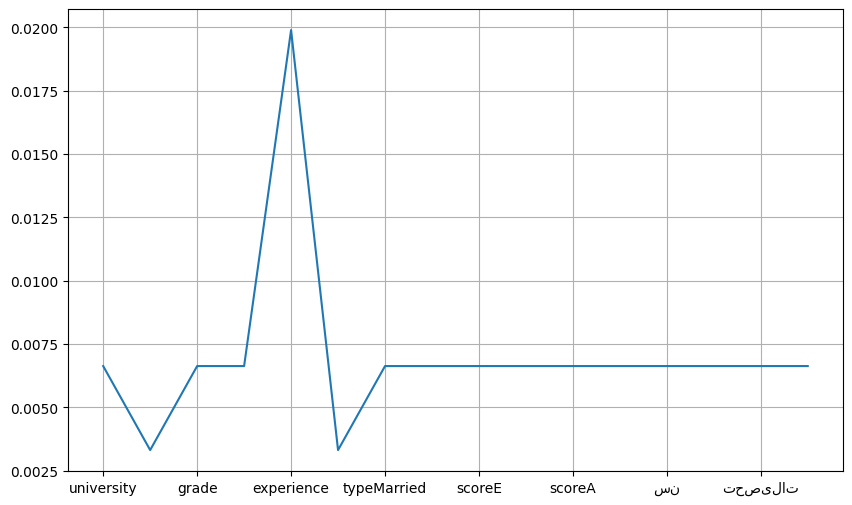

In [ ]:
dfp = df.isnull().sum()/len(df)
dfp.plot(figsize = (10,6),grid = True)

In [ ]:
df.dropna(inplace=True)
df

,university,کد دانشگاه,grade,job,experience,کد تجربه کاری,typeMarried,scoreN,scoreE,scoreO,scoreA,scoreC,سن,جنسیت,تحصیلات,نوع استخدام
0,پیام نور,3,تجربی,کارگر,مرغداری,1,متاهل,47.0,26.0,21.0,35.0,31.0,کمتر از 20 سال,مذکر,دیپلم,پاره وقت
1,تهران,1,مدیریت بازرگانی,دانشجو,۲سال,2,مجرد,21.0,36.0,42.0,37.0,33.0,· 20-24 سال,مونث,فوق دیپلم,قراردادی
2,تهران,1,مهندسی مواد/شناسایی و انتخاب مواد,دانشجو,۱ سال,1,مجرد,0.0,0.0,0.0,0.0,0.0,· 24-28 سال,مذکر,کارشناسی,پیمانی
3,دانشگاه تهران,1,مهندسی متالورژی,پستداک,5 سال,3,مجرد,11.0,28.0,17.0,30.0,34.0,· 28-32 سال,مذکر,کارشناسی ارشد,قراردادی
4,تهران,1,مواد و متالورژی,R&D,تحقیق و توسعه,3,مجرد,33.0,27.0,27.0,30.0,35.0,· 32-36 سال,مذکر,دکتری,پیمانی
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,دانشگاه تهران,1,کارشناسی عمران,دانشجو,تدریس ریاضی و مشاوره کنکور,3,مجرد,16.0,33.0,23.0,35.0,27.0,· 28-32 سال,مونث,کارشناسی,رسمی
895,دانشگاه تهران,1,فلسفه,معلم,8 سال سابقه تدریس,3,مجرد,17.0,33.0,21.0,31.0,35.0,· بیشتر از 36 سال,مذکر,کارشناسی ارشد,رسمی
896,تهران,1,حقوق,آزاد,..,2,متاهل,17.0,36.0,38.0,30.0,41.0,· 28-32 سال,مونث,دکتری,قراردادی
897,تهران,1,عمران/مهندسی و مدیریت ساخت,دانشجو,خدمات نقشه‌برداری فراساحلی,3,مجرد,22.0,32.0,30.0,33.0,36.0,· 32-36 سال,مذکر,دکتری,پیمانی


In [ ]:
df1 = df[['کد تجربه کاری','کد دانشگاه','grade','job','typeMarried','سن','scoreN','scoreE','scoreA','scoreC','scoreO',
                                 'جنسیت','تحصیلات','نوع استخدام']]
df1.head()

,کد تجربه کاری,کد دانشگاه,grade,job,typeMarried,سن,scoreN,scoreE,scoreA,scoreC,scoreO,جنسیت,تحصیلات,نوع استخدام
0,1,3,تجربی,کارگر,متاهل,کمتر از 20 سال,47.0,26.0,35.0,31.0,21.0,مذکر,دیپلم,پاره وقت
1,2,1,مدیریت بازرگانی,دانشجو,مجرد,· 20-24 سال,21.0,36.0,37.0,33.0,42.0,مونث,فوق دیپلم,قراردادی
2,1,1,مهندسی مواد/شناسایی و انتخاب مواد,دانشجو,مجرد,· 24-28 سال,0.0,0.0,0.0,0.0,0.0,مذکر,کارشناسی,پیمانی
3,3,1,مهندسی متالورژی,پستداک,مجرد,· 28-32 سال,11.0,28.0,30.0,34.0,17.0,مذکر,کارشناسی ارشد,قراردادی
4,3,1,مواد و متالورژی,R&D,مجرد,· 32-36 سال,33.0,27.0,30.0,35.0,27.0,مذکر,دکتری,پیمانی


In [ ]:
df1 = pd.get_dummies(df1, columns=['کد تجربه کاری','کد دانشگاه','grade','job','typeMarried','سن',
                                 'جنسیت','تحصیلات','نوع استخدام'],dtype=int)
df1.head()

<ipython-input-45-be0501b6651c>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df1 = pd.get_dummies(df1, columns=['کد تجربه کاری','کد دانشگاه','grade','job','typeMarried','سن',
<ipython-input-45-be0501b6651c>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df1 = pd.get_dummies(df1, columns=['کد تجربه کاری','کد دانشگاه','grade','job','typeMarried','سن',


,scoreN,scoreE,scoreA,scoreC,scoreO,کد تجربه کاری_1,کد تجربه کاری_2,کد تجربه کاری_3,کد دانشگاه_1,کد دانشگاه_2,...,جنسیت_مونث,تحصیلات_دکتری,تحصیلات_دیپلم,تحصیلات_فوق دیپلم,تحصیلات_کارشناسی,تحصیلات_کارشناسی ارشد,نوع استخدام_رسمی,نوع استخدام_قراردادی,نوع استخدام_پاره وقت,نوع استخدام_پیمانی
0,47.0,26.0,35.0,31.0,21.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,21.0,36.0,37.0,33.0,42.0,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,11.0,28.0,30.0,34.0,17.0,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
4,33.0,27.0,30.0,35.0,27.0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
inertia = []
for k in range(1, 11):  # تغییر محدوده تعداد خوشه‌ها در اینجا (از 1 تا 10)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df1)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

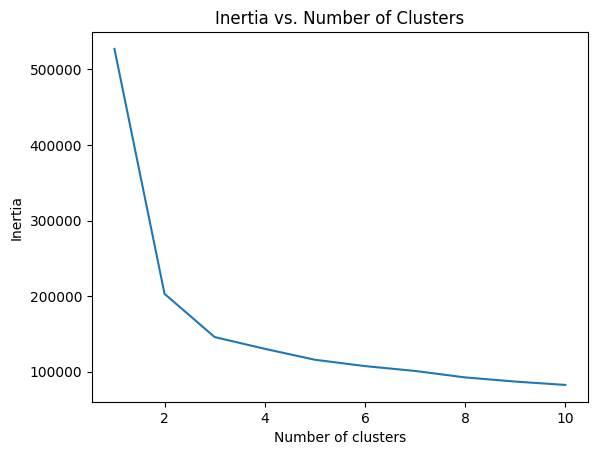

In [ ]:
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df1)
df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df

,university,کد دانشگاه,grade,job,experience,کد تجربه کاری,typeMarried,scoreN,scoreE,scoreO,scoreA,scoreC,سن,جنسیت,تحصیلات,نوع استخدام,Cluster
0,پیام نور,3,تجربی,کارگر,مرغداری,1,متاهل,47.0,26.0,21.0,35.0,31.0,کمتر از 20 سال,مذکر,دیپلم,پاره وقت,2
1,تهران,1,مدیریت بازرگانی,دانشجو,۲سال,2,مجرد,21.0,36.0,42.0,37.0,33.0,· 20-24 سال,مونث,فوق دیپلم,قراردادی,0
2,تهران,1,مهندسی مواد/شناسایی و انتخاب مواد,دانشجو,۱ سال,1,مجرد,0.0,0.0,0.0,0.0,0.0,· 24-28 سال,مذکر,کارشناسی,پیمانی,1
3,دانشگاه تهران,1,مهندسی متالورژی,پستداک,5 سال,3,مجرد,11.0,28.0,17.0,30.0,34.0,· 28-32 سال,مذکر,کارشناسی ارشد,قراردادی,3
4,تهران,1,مواد و متالورژی,R&D,تحقیق و توسعه,3,مجرد,33.0,27.0,27.0,30.0,35.0,· 32-36 سال,مذکر,دکتری,پیمانی,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,دانشگاه تهران,1,کارشناسی عمران,دانشجو,تدریس ریاضی و مشاوره کنکور,3,مجرد,16.0,33.0,23.0,35.0,27.0,· 28-32 سال,مونث,کارشناسی,رسمی,3
895,دانشگاه تهران,1,فلسفه,معلم,8 سال سابقه تدریس,3,مجرد,17.0,33.0,21.0,31.0,35.0,· بیشتر از 36 سال,مذکر,کارشناسی ارشد,رسمی,3
896,تهران,1,حقوق,آزاد,..,2,متاهل,17.0,36.0,38.0,30.0,41.0,· 28-32 سال,مونث,دکتری,قراردادی,0
897,تهران,1,عمران/مهندسی و مدیریت ساخت,دانشجو,خدمات نقشه‌برداری فراساحلی,3,مجرد,22.0,32.0,30.0,33.0,36.0,· 32-36 سال,مذکر,دکتری,پیمانی,0


<Axes: xlabel='Cluster'>

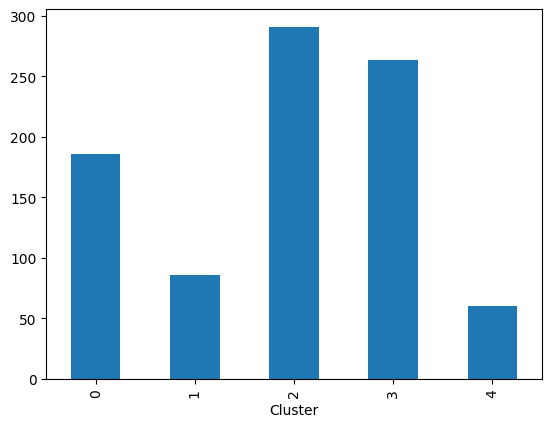

In [ ]:
df.groupby('Cluster').size().plot(kind='bar')

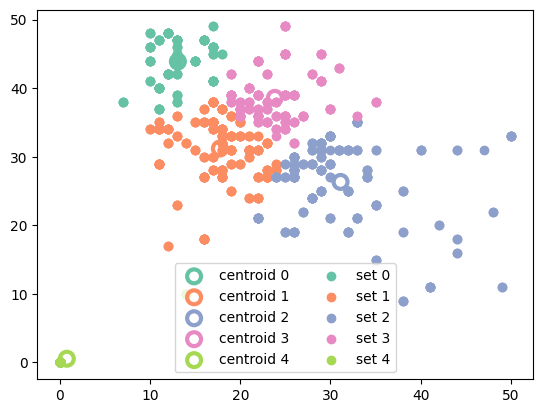

<Figure size 1440x640 with 0 Axes>

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns  # for the iris dataset
import numpy as np
from scipy.spatial.distance import cdist

def kmeans(x, k, no_of_iterations=100):
    idx = np.random.choice(len(x), k, replace=False)
    # Randomly choosing Centroids
    centroids = x[idx, :]
    # finding the distance between centroids and all the data points
    distances = cdist(x, centroids, 'euclidean')
    points = np.array([np.argmin(i) for i in distances])

    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            # Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points == idx].mean(axis=0)
            centroids.append(temp_cent)
        centroids = np.vstack(centroids)  # Updated Centroids
        distances = cdist(x, centroids, 'euclidean')
        points = np.array([np.argmin(i) for i in distances])
    return points, centroids

x = df[['scoreN', 'scoreC']].to_numpy()

k = 5
points, centroids = kmeans(x, k)

colors = plt.cm.Set2.colors
for val, color in zip(range(k), colors):
    plt.scatter(centroids[val, 0], centroids[val, 1], facecolor='none', edgecolor=color, lw=3,
                s=100, label=f'centroid {val}')
for val, color in zip(range(k), colors):
    plt.scatter(x[points == val, 0], x[points == val, 1], color=color, label=f'set {val}')
plt.legend(ncol=2)
from matplotlib.pyplot import figure

figure(figsize=(18, 8), dpi=80)

plt.show()

In [ ]:
df.to_excel('Cluster.xlsx')